<a href="https://colab.research.google.com/github/PedroAlmeida18/PGP3_TESTESIND/blob/main/Rede_neuralP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[13, 10, 5, 4, 2, 7, 9]
[4, 2, 12, 13, 22, 5, 21, 12, 9, 13, 10, 14, 7, 21, 5, 4, 3, 21, 5, 10, 21, 21, 1, 11, 16, 10, 19, 22, 2, 14, 2, 8, 19, 4, 1, 12, 1, 10, 20, 11, 20, 12, 2, 21, 8, 23, 18, 17, 17, 7, 17, 12, 20, 3, 19, 14, 21, 3, 14, 15, 18, 9, 3, 18, 5, 13, 8, 2, 11, 3, 16, 13, 21, 1, 0, 13, 18, 14, 22, 23, 19, 5, 11, 20, 12, 22, 5, 22, 20, 3, 3, 9, 0, 8, 21, 17, 17, 12, 7, 0, 13, 10, 5, 4, 2, 7, 9]
['quinta', 'sexta', 'quinta', 'quinta', 'Terça', 'quinta', 'sexta', 'Segunda, ', 'quinta', 'Segunda, ', 'quarta', 'Terça', 'sexta', 'quarta', 'sexta', 'Segunda, ', 'Terça', 'Terça', 'Segunda, ', 'sexta', 'sexta', 'Terça', 'quinta', 'Segunda, ', 'sexta', 'quinta', 'quarta', 'sexta', 'quarta', 'quarta', 'quarta', 'Segunda, ', 'Segunda, ', 'Segunda, ', 'Terça', 'Segunda, ', 'quinta', 'Terça', 'Segunda, ', 'quinta', 'quinta', 'Segunda, ', 'sexta', 'quarta', 'quinta', 'sexta', 'quinta', 'sexta', 'quinta', 'Terça', 'quinta', 'quarta', 'Segunda, ', 'Terça', 'quarta', 'sexta', 'Terça', 'sext

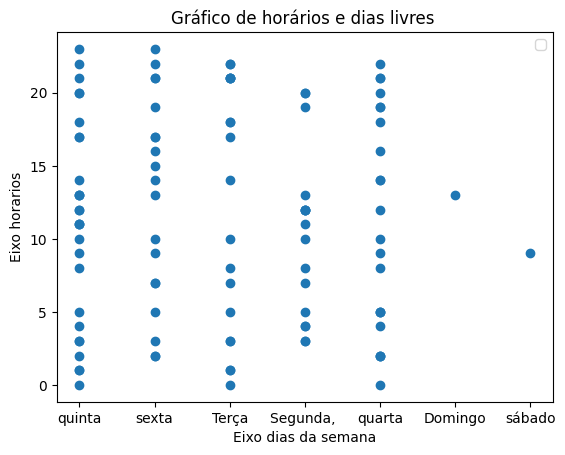

cuda


In [68]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
dadoshorarioslivres =[13,10,5,4,2,7,9]
dias_semana = ['Domingo', 'Segunda, ', 'Terça', 'quarta', 'quinta', 'sexta', 'sábado']
print(dadoshorarioslivres)
for i in range (0,100):
  horarios = random.randint(0,23)
  #print(horarios)
  dadoshorarioslivres.insert(0,horarios)
for i in range(0,100):
  dias = random.choice(dias_semana)
  #print(dias)
  dias_semana.insert(0,dias)



print(dadoshorarioslivres)
print(dias_semana)
plt.scatter(dias_semana,dadoshorarioslivres)
plt.xlabel('Eixo dias da semana')
plt.ylabel('Eixo horarios')
plt.title('Gráfico de horários e dias livres ')
plt.legend()
plt.show()




#tns = torch.Tensor(dadoshorarios)
print(device)






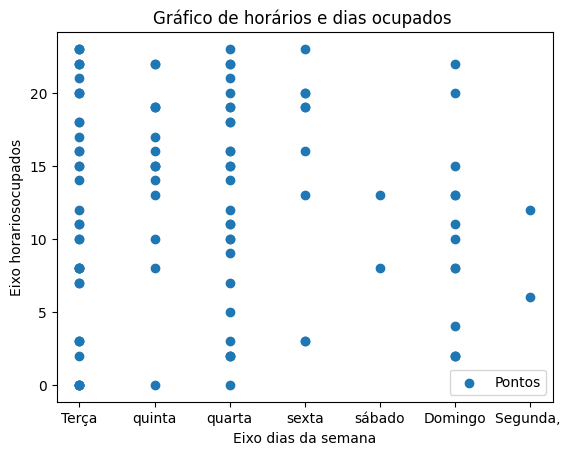

In [69]:
dadoshorariosocupados=[8,12,18,7,15,20,8]
dias_semana = ['Domingo', 'Segunda, ', 'Terça', 'quarta', 'quinta', 'sexta', 'sábado']
for i in range (0,100):
  horarios = random.randint(0,23)
  #print(horarios)
  dadoshorariosocupados.insert(0,horarios)
for i in range(0,100):
  dias = random.choice(dias_semana)
  #print(dias)
  dias_semana.insert(0,dias)




plt.scatter(dias_semana, dadoshorariosocupados,label='Pontos')
plt.xlabel('Eixo dias da semana')
plt.ylabel('Eixo horariosocupados')
plt.title('Gráfico de horários e dias ocupados ')
plt.legend()
plt.show()

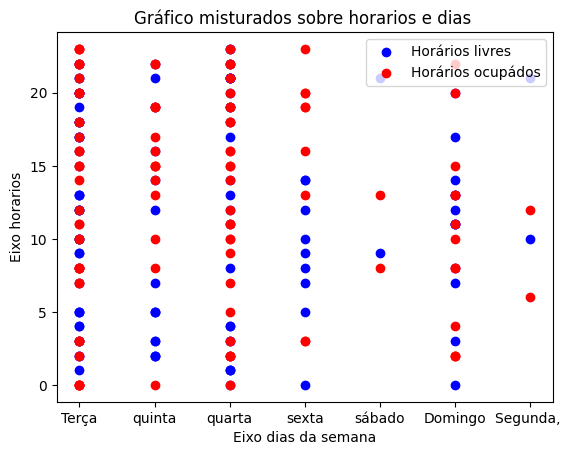

In [70]:
plt.scatter(dias_semana,dadoshorarioslivres, label = 'Horários livres', color = 'blue')
plt.scatter(dias_semana, dadoshorariosocupados,label = 'Horários ocupádos', color = 'red')
plt.xlabel('Eixo dias da semana')
plt.ylabel('Eixo horarios')
plt.title('Gráfico misturados sobre horarios e dias ')
plt.legend()
plt.show()


In [76]:
X = []
Y = []
for i in range(100):
    horario_livre = random.randint(0, 23)
    X.append([horario_livre, 0])  # 0 representa horário livre
    Y.append([1])  # 1 indica que o horário está livre

    horario_ocupado = random.randint(0, 23)
    X.append([horario_ocupado, 1])  # 1 representa horário ocupado
    Y.append([0])


rotulos = [1] * len(dadoshorarioslivres) + [0] * len(dadoshorariosocupados)

# Converter dados para tensores PyTorch
dados_input = torch.tensor(X, dtype=torch.float32).to(device)
rotulos_output = torch.tensor(Y, dtype=torch.float32).to(device)

# Definir a arquitetura da rede neural
class RedeNeural(nn.Module):
    def __init__(self):
        super(RedeNeural, self).__init__()
        self.camada_entrada = nn.Linear(2, 8)  # 2 entradas (horários livres e ocupados), 8 neurônios na camada oculta
        self.relu = nn.ReLU()
        self.camada_saida = nn.Linear(8, 1)  # 8 neurônios na camada oculta, 1 saída

    def forward(self, x):
        x = self.camada_entrada(x)
        x = self.relu(x)
        x = self.camada_saida(x)
        return x

# Instanciar o modelo e transferir para GPU, se disponível
modelo = RedeNeural().to(device)

#Definir a função de perda
criterion = 0
optimizador = 0




